In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Data/master_data.csv")
data.drop(columns=["Unnamed: 0"], inplace=True)
data = data.dropna()

In [3]:
#sum stats
sum_stats = data[['price', 'vol', 'return', 'share_passive', 'abnormal_return', 'price_vol']].describe()
sum_stats

,price,vol,return,share_passive,abnormal_return,price_vol
count,265525.000000,2.655250e+05,265525.000000,265525.000000,265525.000000,265525.000000
mean,55.873753,1.913440e+06,-0.000363,0.182523,0.038586,0.597051
std,149.256073,8.215777e+06,0.047230,0.159835,0.054052,1.993120
min,0.033500,1.070000e+02,-0.804171,0.000006,0.000000,0.000000
25%,7.200000,1.309080e+05,-0.018519,0.033440,0.010840,0.068880
50%,21.309999,4.460360e+05,-0.000743,0.149134,0.024907,0.193592
75%,57.290001,1.375649e+06,0.016152,0.251590,0.049451,0.531485
max,5819.680176,8.724168e+08,5.382716,0.946899,5.751672,216.289718


In [4]:
data['passive_q'] = pd.qcut(data['share_passive'], q=4, labels=False) + 1

In [5]:
avg_ab_returns = (data.groupby(['days_from_earn', 'passive_q'])['abnormal_return'].mean().reset_index())

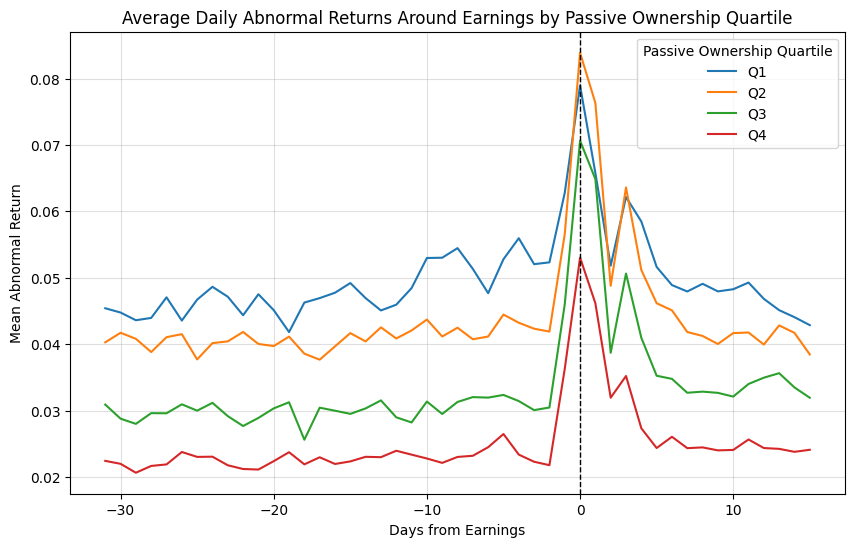

In [6]:
plt.figure(figsize=(10,6))
for q in sorted(data['passive_q'].unique()):
    subset = avg_ab_returns[avg_ab_returns['passive_q'] == q]
    plt.plot(subset['days_from_earn'], subset['abnormal_return'], label=f'Q{q}')

plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title('Average Daily Abnormal Returns Around Earnings by Passive Ownership Quartile')
plt.xlabel('Days from Earnings')
plt.ylabel('Mean Abnormal Return')
plt.legend(title='Passive Ownership Quartile')
plt.grid(True, alpha = 0.4)
plt.show()

In [7]:
avg_3volatility = (data.groupby(['days_from_earn', 'passive_q'])['3day_vol'].mean().reset_index())

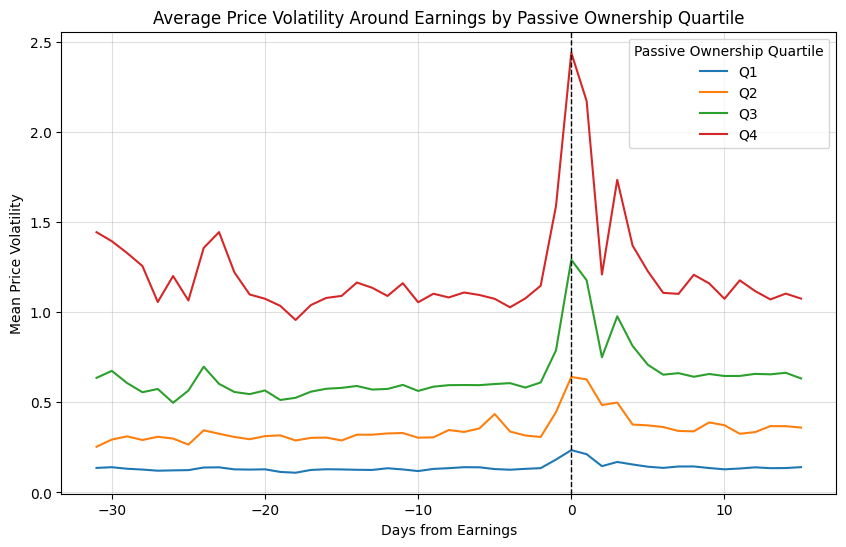

In [8]:
plt.figure(figsize=(10,6))
for q in sorted(data['passive_q'].unique()):
    subset = avg_3volatility[avg_3volatility['passive_q'] == q]
    plt.plot(subset['days_from_earn'], subset['3day_vol'], label=f'Q{q}')

plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title('Average Price Volatility Around Earnings by Passive Ownership Quartile')
plt.xlabel('Days from Earnings')
plt.ylabel('Mean Price Volatility')
plt.legend(title='Passive Ownership Quartile')
plt.grid(True, alpha = 0.4)
plt.show()